<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [140]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (1).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We do this because we want to avoid overfitting the model which will yield great results on our trainingset but will be of no practical use

In [141]:
# Show dataset
# split data into training and test datasets
# will implement the sklearn method here instead of manually splitting just need to ensure is 50/50 before linear model
trainingSet = df[0:284]
testSet = df[285:570]
xDiagnosis = trainingSet['Diagnosis']
yDiagnnosis = testSet['Diagnosis']
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)
X = trainingSet
y = testSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)



In [142]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
76          B       13.530  ...          0.2710                  0.07191
115         B       11.930  ...          0.2438                  0.08541
120         B       11.410  ...          0.3016                  0.08523
155         B       12.250  ...          0.3113                  0.08132
159         B       10.900  ...          0.2738                  0.07685
..        ...          ...  ...             ...                      ...
188         B       11.810  ...          0.3200                  0.06576
71          B        8.888  ...          0.2254                  0.10840
106         B       11.640  ...          0.2806                  0.09097
270         B       14.290  ...          0.2458                  0.06120
102         B       12.180  ...          0.2694                  0.06878

[170 rows x 31 columns]
y_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
361     

In [143]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (114, 31)
y_test set shape:  (114, 31)
X_train shape:  (170, 31)
y_train shape:  (170, 31)


In [144]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

## Show standard deviation of diagnose between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.

In [145]:
print('Standard deviation of diagnosis values in x training set ',X_train['Diagnosis'].std())
print('Variance of diagnosis values in x training set: ', X_train['Diagnosis'].var())
print('Standard deviation of diagnosis values in y training set ',y_train['Diagnosis'].std())
print('Variance of diagnosis values in y training set: ', y_train['Diagnosis'].var())

Standard deviation of diagnosis values in x training set  0.4997737044464306
Variance of diagnosis values in x training set:  0.24977375565610818
Standard deviation of diagnosis values in y training set  0.43598171485845033
Variance of diagnosis values in y training set:  0.1900800556909151


In [146]:
print('Standard deviation of diagnosis values in x testing set ',X_test['Diagnosis'].std())
print('Variance of diagnosis values in x testing set: ', X_test['Diagnosis'].var())
print('Standard deviation of diagnosis values in y testing set ',y_test['Diagnosis'].std())
print('Variance of diagnosis values in y testing set: ', y_test['Diagnosis'].var())

Standard deviation of diagnosis values in x testing set  0.5009694064706263
Variance of diagnosis values in x testing set:  0.25097034621953157
Standard deviation of diagnosis values in y testing set  0.4094823887970994
Variance of diagnosis values in y testing set:  0.1676758267349789


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets

In [147]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.680896,0.510790,0.698378,0.632631,0.301186,0.591626,0.708415,0.737594,0.317247,0.019387,0.452148,-0.018162,0.450512,0.433906,-0.023467,0.313859,0.390731,0.415037,-0.035889,0.096009,0.734999,0.516929,0.755216,0.667190,0.412817,0.603356,0.725151,0.807562,0.420697,0.365368
Mean_Radius,0.680896,1.000000,0.407549,0.997652,0.986652,0.105653,0.442050,0.684366,0.799709,0.134882,-0.318341,0.687999,0.003316,0.668449,0.737092,-0.073371,0.179410,0.307052,0.354084,-0.047828,-0.020173,0.955495,0.344872,0.954110,0.929432,0.014555,0.312980,0.488150,0.666992,0.074019,-0.041576
Mean_Texture,0.510790,0.407549,1.000000,0.411890,0.377900,0.002323,0.295113,0.368448,0.350810,0.077997,-0.077929,0.197380,0.245291,0.195196,0.201360,-0.073040,0.197631,0.228089,0.200174,-0.118125,0.034148,0.470585,0.922195,0.468852,0.445850,0.163870,0.368098,0.419675,0.426107,0.157037,0.176736
Mean_Perimeter,0.698378,0.997652,0.411890,1.000000,0.984237,0.149318,0.497341,0.725995,0.832458,0.174505,-0.264601,0.702356,0.020387,0.688811,0.746793,-0.052779,0.225684,0.344614,0.386140,-0.027207,0.019453,0.954618,0.350025,0.958811,0.927336,0.050717,0.357150,0.525014,0.697438,0.100245,0.002766
Mean_Area,0.632631,0.986652,0.377900,0.984237,1.000000,0.104196,0.413513,0.675669,0.783927,0.112910,-0.304632,0.738288,0.036578,0.716608,0.800129,-0.024580,0.171654,0.306358,0.326804,-0.005328,-0.001084,0.936344,0.313072,0.933594,0.933788,0.006217,0.266507,0.448137,0.619915,0.030387,-0.064370
Mean_Smoothness,0.301186,0.105653,0.002323,0.149318,0.104196,1.000000,0.679628,0.570745,0.557960,0.591387,0.612976,0.283672,0.093122,0.281372,0.220664,0.349076,0.437748,0.378539,0.349119,0.250990,0.376719,0.130695,0.028663,0.165937,0.107118,0.744732,0.481776,0.451291,0.473374,0.370515,0.508554
Mean_Compactness,0.591626,0.442050,0.295113,0.497341,0.413513,0.679628,1.000000,0.883110,0.823307,0.661162,0.609068,0.459225,0.142522,0.491670,0.399000,0.180325,0.743235,0.657956,0.594783,0.250540,0.530680,0.478456,0.289606,0.535011,0.432912,0.560892,0.849069,0.810606,0.802604,0.529575,0.686846
Mean_Concavity,0.708415,0.684366,0.368448,0.725995,0.675669,0.570745,0.883110,1.000000,0.941807,0.527212,0.337026,0.653322,0.165100,0.651999,0.627276,0.223013,0.625116,0.706050,0.577415,0.201417,0.410165,0.684954,0.339569,0.725252,0.650530,0.467358,0.704894,0.838304,0.834644,0.382775,0.481129
Mean_Concave_Points,0.737594,0.799709,0.350810,0.832458,0.783927,0.557960,0.823307,0.941807,1.000000,0.492890,0.198524,0.678787,0.097700,0.679424,0.661208,0.113903,0.482439,0.536653,0.556586,0.136684,0.273562,0.794810,0.313910,0.827501,0.756678,0.405498,0.615116,0.735792,0.870373,0.336886,0.345798
Mean_Symmetry,0.317247,0.134882,0.077997,0.174505,0.112910,0.591387,0.661162,0.527212,0.492890,1.000000,0.528998,0.249824,0.155000,0.257804,0.171880,0.106483,0.441593,0.332052,0.286804,0.381960,0.323685,0.172174,0.106204,0.209177,0.139621,0.439647,0.533561,0.476871,0.462963,0.669196,0.501501


In [148]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.751673,0.373062,0.763743,0.742499,0.222753,0.535701,0.743127,0.797409,0.263075,-0.107406,0.579099,0.036227,0.570424,0.522859,-0.092702,0.273609,0.387041,0.435544,-0.015498,0.072516,0.769609,0.399335,0.779767,0.726187,0.258216,0.500184,0.650881,0.760069,0.284044,0.155218
Mean_Radius,0.751673,1.000000,0.239975,0.998055,0.984367,0.060511,0.436485,0.694484,0.822241,0.100956,-0.363946,0.685909,-0.139948,0.673536,0.702005,-0.320399,0.152926,0.289493,0.392137,-0.188059,-0.101625,0.981440,0.217485,0.975236,0.938529,0.012937,0.333467,0.524964,0.735718,0.099777,-0.093010
Mean_Texture,0.373062,0.239975,1.000000,0.247057,0.254123,-0.136565,0.120337,0.300376,0.257090,0.041166,-0.175971,0.307403,0.519567,0.316294,0.261770,0.065886,0.166412,0.226142,0.168049,0.158453,-0.010629,0.257960,0.925037,0.269449,0.259310,-0.073185,0.159523,0.280029,0.229943,0.047276,-0.056903
Mean_Perimeter,0.763743,0.998055,0.247057,1.000000,0.985040,0.094387,0.486364,0.733701,0.849506,0.132191,-0.319579,0.698131,-0.137208,0.692568,0.712190,-0.300084,0.197512,0.329795,0.424558,-0.180299,-0.061057,0.980905,0.223085,0.980481,0.940216,0.044200,0.376614,0.563816,0.763348,0.115079,-0.047171
Mean_Area,0.742499,0.984367,0.254123,0.985040,1.000000,0.081434,0.441935,0.709299,0.831600,0.125886,-0.327824,0.769620,-0.105884,0.756943,0.797426,-0.258217,0.169021,0.296556,0.396847,-0.153725,-0.069069,0.982552,0.224640,0.978655,0.975233,0.035487,0.320775,0.511981,0.723380,0.090322,-0.083816
Mean_Smoothness,0.222753,0.060511,-0.136565,0.094387,0.081434,1.000000,0.641977,0.393055,0.433792,0.508824,0.663598,0.212415,0.036182,0.224584,0.149821,0.413777,0.281533,0.246223,0.413336,0.144835,0.383248,0.086968,-0.102384,0.115225,0.101810,0.830967,0.376349,0.301556,0.387475,0.221114,0.495533
Mean_Compactness,0.535701,0.436485,0.120337,0.486364,0.441935,0.641977,1.000000,0.844181,0.784873,0.544589,0.576363,0.422063,-0.065242,0.492333,0.373283,0.182899,0.729698,0.694342,0.691695,-0.003226,0.587712,0.448127,0.116641,0.514020,0.431272,0.588550,0.835021,0.788914,0.786129,0.309456,0.701170
Mean_Concavity,0.743127,0.694484,0.300376,0.733701,0.709299,0.393055,0.844181,1.000000,0.927722,0.397938,0.209469,0.605948,-0.011311,0.671353,0.590658,0.026257,0.639193,0.770098,0.704349,-0.062609,0.412057,0.698411,0.284069,0.754770,0.688788,0.371415,0.730860,0.886140,0.880110,0.212582,0.446988
Mean_Concave_Points,0.797409,0.822241,0.257090,0.849506,0.831600,0.433792,0.784873,0.927722,1.000000,0.377641,0.108293,0.694209,-0.013580,0.723027,0.655047,-0.002898,0.486336,0.590361,0.695640,-0.053535,0.276818,0.823355,0.244202,0.854547,0.802171,0.366757,0.592429,0.740424,0.905512,0.193305,0.292539
Mean_Symmetry,0.263075,0.100956,0.041166,0.132191,0.125886,0.508824,0.544589,0.397938,0.377641,1.000000,0.435163,0.252481,0.048517,0.279559,0.181693,0.345295,0.445103,0.365807,0.456580,0.383028,0.387127,0.113007,-0.000671,0.147379,0.128592,0.396082,0.373323,0.314502,0.338973,0.604691,0.363574


In [149]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.738611,0.437279,0.744348,0.723051,0.326579,0.553256,0.529466,0.728524,0.295472,-0.057076,0.602384,-0.097555,0.588492,0.671634,-0.257699,0.240417,0.044278,0.271073,-0.026961,-0.012218,0.794445,0.497197,0.788109,0.769011,0.399982,0.567533,0.510694,0.756067,0.432089,0.295159
Mean_Radius,0.738611,1.000000,0.434567,0.997107,0.990571,0.074074,0.533572,0.560956,0.791973,0.143899,-0.326023,0.668240,-0.135759,0.692834,0.803483,-0.352719,0.255948,0.037826,0.302723,-0.082749,-0.077855,0.967720,0.384141,0.961966,0.947647,0.123541,0.458641,0.448602,0.757085,0.193489,0.023496
Mean_Texture,0.437279,0.434567,1.000000,0.441002,0.441712,-0.042829,0.284701,0.266157,0.330094,0.042845,-0.074022,0.369031,0.320661,0.395765,0.402098,-0.145483,0.197110,0.037954,0.085240,-0.007187,0.024879,0.430975,0.885119,0.440635,0.430136,0.039468,0.310632,0.247683,0.279432,0.117799,0.154987
Mean_Perimeter,0.744348,0.997107,0.441002,1.000000,0.990198,0.116649,0.591829,0.608947,0.826266,0.183928,-0.266879,0.684331,-0.121952,0.717633,0.817161,-0.327216,0.306329,0.071831,0.335676,-0.045870,-0.040205,0.967529,0.391195,0.968529,0.948955,0.155002,0.504520,0.490097,0.784988,0.224386,0.069439
Mean_Area,0.723051,0.990571,0.441712,0.990198,1.000000,0.093510,0.543362,0.583964,0.801161,0.148435,-0.284741,0.689332,-0.115395,0.715833,0.826950,-0.294582,0.279189,0.067575,0.317673,-0.063313,-0.047957,0.962100,0.378499,0.958896,0.959033,0.140400,0.454312,0.457851,0.751493,0.183068,0.036865
Mean_Smoothness,0.326579,0.074074,-0.042829,0.116649,0.093510,1.000000,0.588707,0.491891,0.537854,0.570568,0.587917,0.290083,0.093485,0.275107,0.261777,0.334881,0.274369,0.180648,0.322198,0.252616,0.223327,0.156439,0.047365,0.185380,0.174568,0.797986,0.474185,0.420238,0.476524,0.464733,0.495421
Mean_Compactness,0.553256,0.533572,0.284701,0.591829,0.543362,0.588707,1.000000,0.885355,0.857201,0.586000,0.539948,0.573386,0.052643,0.649479,0.606473,0.052846,0.766098,0.459382,0.604225,0.351789,0.454811,0.564917,0.301581,0.625324,0.559662,0.492932,0.873098,0.793239,0.812326,0.550864,0.650433
Mean_Concavity,0.529466,0.560956,0.266157,0.608947,0.583964,0.491891,0.885355,1.000000,0.868963,0.523793,0.479287,0.602093,0.113383,0.638637,0.625439,0.049474,0.786584,0.704302,0.752957,0.307380,0.585424,0.577136,0.261442,0.623278,0.583764,0.405219,0.748583,0.888708,0.824546,0.452890,0.558649
Mean_Concave_Points,0.728524,0.791973,0.330094,0.826266,0.801161,0.537854,0.857201,0.868963,1.000000,0.490800,0.195368,0.724632,-0.003820,0.751076,0.794917,-0.028903,0.546803,0.321526,0.596248,0.161651,0.254899,0.810763,0.320868,0.838700,0.807630,0.468427,0.704963,0.707899,0.924979,0.424211,0.387457
Mean_Symmetry,0.295472,0.143899,0.042845,0.183928,0.148435,0.570568,0.586000,0.523793,0.490800,1.000000,0.469179,0.391491,0.153560,0.391260,0.330120,0.082330,0.423413,0.333155,0.451254,0.604280,0.363513,0.183785,0.079626,0.222468,0.175911,0.367894,0.438728,0.421546,0.448111,0.743075,0.376982


In [150]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.795478,0.320698,0.806576,0.807647,0.558235,0.681725,0.818977,0.860249,0.347764,0.092164,0.706765,0.038154,0.706670,0.767509,0.035402,0.293405,0.397359,0.527447,0.013413,0.115651,0.835915,0.360343,0.837227,0.827264,0.539405,0.644477,0.751234,0.838544,0.388176,0.411559
Mean_Radius,0.795478,1.000000,0.194827,0.998737,0.989872,0.455657,0.634214,0.771739,0.884262,0.147482,-0.230564,0.647004,-0.173750,0.657209,0.774256,-0.264541,0.218806,0.274567,0.454973,-0.163486,-0.000247,0.978464,0.204555,0.973942,0.953422,0.345089,0.602431,0.670172,0.841016,0.271396,0.155051
Mean_Texture,0.320698,0.194827,1.000000,0.201448,0.201235,0.076836,0.236408,0.261361,0.219162,0.121661,0.084810,0.283292,0.482814,0.291590,0.254221,0.205721,0.225980,0.211808,0.205720,0.046134,0.201721,0.219231,0.905581,0.229765,0.211733,0.151413,0.245674,0.239990,0.203816,0.056208,0.219182
Mean_Perimeter,0.806576,0.998737,0.201448,1.000000,0.989559,0.479361,0.670310,0.798804,0.901984,0.175766,-0.189544,0.654747,-0.162732,0.668266,0.779008,-0.251316,0.254394,0.308250,0.480303,-0.136807,0.029085,0.979101,0.211755,0.977407,0.954815,0.364142,0.635022,0.699144,0.860159,0.296904,0.192764
Mean_Area,0.807647,0.989872,0.201235,0.989559,1.000000,0.451882,0.636388,0.790927,0.897520,0.169197,-0.195570,0.695069,-0.142870,0.705097,0.818742,-0.206353,0.225943,0.284166,0.454980,-0.134650,0.010080,0.983216,0.207768,0.979414,0.977622,0.345205,0.599012,0.670737,0.835205,0.278431,0.163609
Mean_Smoothness,0.558235,0.455657,0.076836,0.479361,0.451882,1.000000,0.714345,0.632900,0.673658,0.530683,0.413859,0.414543,0.066438,0.405241,0.430709,0.151398,0.206740,0.309249,0.440236,0.118934,0.081379,0.484376,0.168892,0.493348,0.469293,0.840047,0.547405,0.594188,0.673218,0.518060,0.463000
Mean_Compactness,0.681725,0.634214,0.236408,0.670310,0.636388,0.714345,1.000000,0.922277,0.853125,0.557840,0.526042,0.541361,0.045366,0.589546,0.570017,0.051506,0.696996,0.718695,0.702758,0.279618,0.447389,0.651493,0.248797,0.687957,0.639742,0.579321,0.913443,0.898631,0.857501,0.574043,0.710447
Mean_Concavity,0.818977,0.771739,0.261361,0.798804,0.790927,0.632900,0.922277,1.000000,0.947317,0.488295,0.336124,0.652483,0.045467,0.690080,0.710141,0.026923,0.607402,0.697123,0.695471,0.209558,0.344352,0.789580,0.285008,0.813021,0.790653,0.519222,0.863278,0.933472,0.906831,0.523504,0.584060
Mean_Concave_Points,0.860249,0.884262,0.219162,0.901984,0.897520,0.673658,0.853125,0.947317,1.000000,0.416139,0.151115,0.694257,-0.015307,0.708796,0.772055,-0.054608,0.418754,0.493847,0.615072,0.080393,0.193197,0.894213,0.259589,0.903942,0.889236,0.539941,0.768761,0.841189,0.943115,0.482934,0.436776
Mean_Symmetry,0.347764,0.147482,0.121661,0.175766,0.169197,0.530683,0.557840,0.488295,0.416139,1.000000,0.516437,0.287626,0.216441,0.303837,0.232473,0.261926,0.327478,0.384539,0.342256,0.385810,0.218595,0.191624,0.152482,0.215046,0.201716,0.453172,0.469165,0.464364,0.384487,0.749859,0.479226


# Training the linear regression model

Here we are using linear regression to compare features in our model to see the correlation between them.  We are training this model to show us how dependent the variables are on one another.

# Creating linear regression model for Area Severity and Smoothness Severity
Here I have trained a model to show us the negative correlation between two features in our dataset, we can clearly see from this model that the smoothness has a negative impact on the Area Severity.  When the smoothness severity value increases then on average the area severity value decreases and vice versa.

y test r^2 value:  1.0
mean_squared_error value:  6.362931064958255e-06
Coefficient:  [[-7.78362037e-06]]
Intercept:  [0.00739018]
predict  [[0.00619617]]


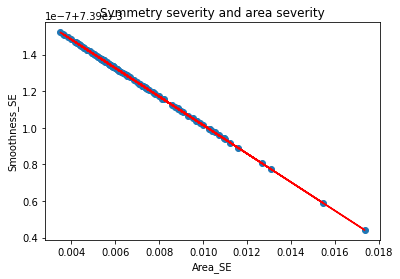

In [285]:
# Here we train a model to perform linear regression data set to predict the diagnosis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
from scipy import stats
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Smoothness_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Smoothness_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Area_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Area_SE']).reshape(-1,1)
enc = OneHotEncoder(handle_unknown='ignore')
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)

plt.xlabel("Area_SE")
plt.ylabel("Smoothness_SE")
plt.title('Symmetry severity and area severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')
print('predict ',regression_model.predict([[153.4]]))


# Positive correlation
Here we compare the concave points severity with the concavity severity, we see that there is a positive linear correlation between the two variables, we also see that the R^2 value is one which indicates a possible overfitting of our model.  We can see clearly from this graph that the two variables have a high correlation and that if the value increases in one of the variables then we can predict that the other variable also increases

y test r^2 value:  1.0
mean_squared_error value:  3.107933712306938e-05
Coefficient:  [[0.0461553]]
Intercept:  [0.00963128]


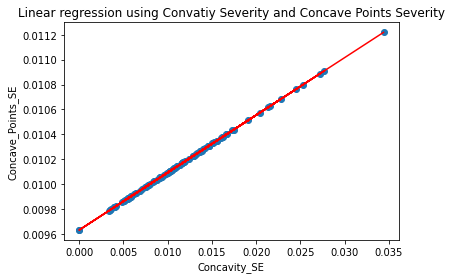

In [281]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
y_pred = regression_model.predict(y_testArray)
rSquared = regression_model.score(y_testArray, y_pred)
print('y test r^2 value: ', rSquared)
print('mean_squared_error value: ', mean_squared_error(y_testArray, y_pred))
print('Coefficient: ',regression_model.coef_)
print('Intercept: ',regression_model.intercept_)
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(y_testArray,y_pred)
plt.plot(y_testArray,y_pred,c='r')

# Examples of low and high correlation in our dataset

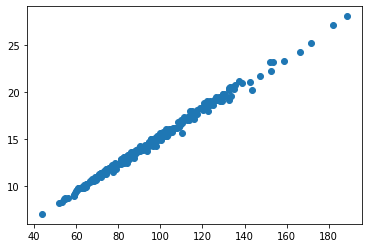

In [182]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


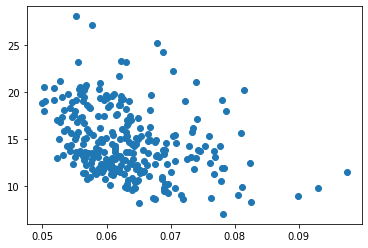

In [183]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.84 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [276]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knnTrainSet = X_train.drop(['Diagnosis'],axis=1)
knnTestSet = np.array(X_test['Diagnosis']).reshape(-1,1)
yknnTestSet = np.array(y_test['Diagnosis'])
knn.fit(X_train,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(X_train,y_train['Diagnosis']))


Performance on X_test:  0.8529411764705882


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [277]:
# Make prediction on testSet
X_predictions = knn.predict(X_test)
y_predictions = knn.predict(y_test)



In [278]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', X_predictions[count])
  if X_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [279]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', y_predictions[count])
  if y_predictions[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose the features used to train this model by selecting features which appear to have a high influence on the diagnosis, in Naive Bayes the weights of the features have no bearing on the output.  The model below is performing accurately but perhaps it is overfitting which is why I included two Naive Bayes Models in this notebook, the only difference being the number of features.  

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [312]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE',	'Smoothness_SE',	'Compactness_SE',	'Concavity_SE','Concave_Points_SE',	'Symmetry_SE'	,'Fractal_Dimension_SE']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
print(diagnosisPrediction)
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
print(diagnosisPrediction)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [313]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', diagnosisPrediction[count])
  if actualValues[count] == XDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [314]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  1
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

# Second Naive Bayes Model
As we can see the model below has worse performance than the model above, you may be asking why we've included this model, the reason why is that the above model seems to be trained a little too well on our training data and may not be able to predict values outside of our dataset too well.

In [309]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE']],y_train[['Diagnosis']])
XDiagnosisPrediction = naive_bayes.predict(X_test[['Diagnosis']])
print(diagnosisPrediction)
yDiagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
print(diagnosisPrediction)

[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 0 0 1]


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [310]:
correct = 0;
count = 0;
actualValues = np.array(y_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', yDiagnosisPrediction[count])
  if actualValues[count] == yDiagnosisPrediction[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

In [311]:
correct = 0;
count = 0;
actualValues = np.array(X_test['Diagnosis']).reshape(-1,1)
for i in actualValues:
  print('Actual: ', actualValues[count], ' Predicted: ', XDiagnosisPrediction[count])
  if XDiagnosisPrediction[count] == actualValues[count]:
    correct+=1
  count+=1
print('Total values: ',count, ' correctly predicted values: ',correct)


Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [1]  Predicted:  0
Actual:  [0]  Predicted:  0
Actual:  [0]  Predic

Let's make some predictions based on features from randomly selected rows

As we see above the model performs very well, not 100% perfect but good enough for classification as it predicted 4/5 or 80% of the diagnosis values for the given row
Judiging by the Naive Bayes score we achieved which was around 81% this is to be expected

In [ ]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  0.001587218878061569
mean squared errors value:  13.339169290650567


In [ ]:
y_test.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.500,17.48,88.54,553.7,0.12980,0.14720,0.052330,0.06343,0.2369,0.06922
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.000000,0.00000,0.3058,0.09938
442,0,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.270,17.50,97.90,706.6,0.10720,0.10710,0.035170,0.03312,0.1859,0.06810
494,0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.076980,0.04195,0.2687,0.07429
360,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,0.3511,0.9527,2.329,28.30,0.005783,0.004693,0.000793,0.003617,0.02043,0.001058,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
